In [2]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


print(tf.__version__)

2.9.1


In [3]:
data = pd.read_csv('./ChurnDataset/Churn_Modelling.csv')
print(data.head(4))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  


In [4]:
#Divide the dataset into independent and dependent feature (iloc= index location)
X = data.iloc[:,3:13]
y = data.iloc[:, 13]
X.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
#feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [6]:
## concatenate the variable with the dataframe axis=1 means droping the col
X = X.drop(['Geography' , 'Gender'], axis=1)
#X.shape

In [7]:

X = pd.concat([X, geography, gender], axis=1)
X.shape

(10000, 11)

In [8]:
## spliting the dataset int training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(8000, 11)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
## let's create the ANN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout 
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) 


In [11]:
# let's innitialize the ANN
classifier = Sequential()
## Add the input layer
classifier.add(Dense(units=14,activation='ReLU'))

In [12]:
# add the first hidden layer
classifier.add(Dense(units = 7, activation='ReLU'))
classifier.add(Dropout(0.2))

In [13]:
# add the second hidden Layer
classifier.add(Dense(units= 6, activation='ReLU'))
classifier.add(Dropout(0.3))

In [14]:
## adding the output layer
classifier.add(Dense(1, activation='sigmoid'))


In [15]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    #start_from_epoch=0,
) 

In [ ]:
## we train the entire neural network
classifier.compile(optimizer= opt, loss='binary_crossentropy',metrics=['accuracy'])
model_history= classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=10, callbacks=early_stopping)

In [17]:
# shows the parameters used for the model
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

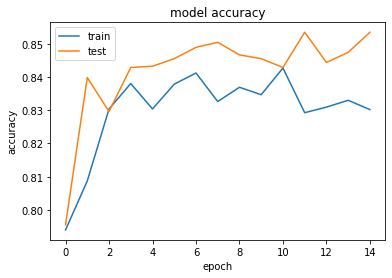

In [18]:
#plot of summary history for the accuracy metrics
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show( )




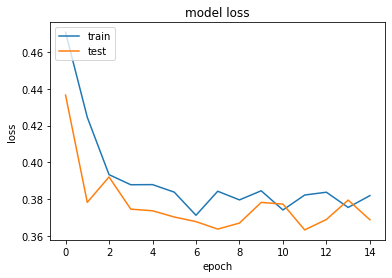

In [19]:
#plot for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show( )


In [20]:
## making the prediction and evaluating the model
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 1s 2ms/step


In [21]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)


In [22]:
#3 calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.8605


In [23]:
# to see the weights
#classifier.get_weights()